# LISA Sensitivity Notebook

#### Import relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from math import *
import matplotlib.ticker
import LISA_tools as LISA

## Set physical and LISA constants

In [2]:
""" Cosmological values """
H0      = 69.6      # Hubble parameter today
Omega_m = 0.286     # density parameter of matter

""" LISA arm length """
L = 2.5e9 # meters

""" Transfer Frequency """
f_star = LISA.C/(2.*np.pi*L)

""" Observation Period """
Tobs = 4.*LISA.YEAR

""" Number of Michelson Data Channels """
NC = 2

constants = np.array([H0, Omega_m, L, f_star, Tobs, NC])

## Construct, Plot, and save to dat file, the characteristic noise strain for specified observation period

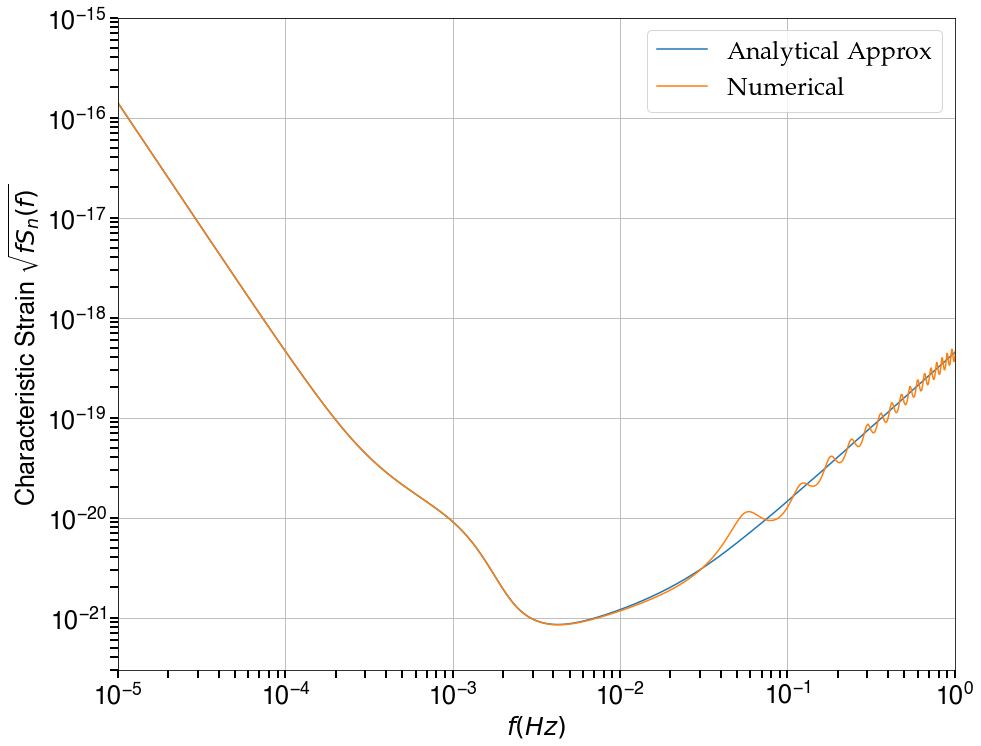

In [3]:
"""
Construct Noise curve
"""

""" Read in Transfer Function """
transfer_data = np.genfromtxt('R.txt')
f = transfer_data[:,0]*f_star # convert to frequency
R = transfer_data[:,1]*NC     # response gets improved by more data channels

"""
Calculate, Plot, and save the noise curve
"""
f, Sn = LISA.get_Sn(constants)
Sn_approx = LISA.get_Sn_approx(f,f_star,L,NC) #Noise curve minus the galactic confusion background
Sc_approx = LISA.get_Sc_est(f,Tobs,NC)

figNoiseCurve,ax=plt.subplots(figsize=(15,12))

""" Set the font and style of plot """
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

ax.set_xlabel(r'$f (Hz) $',fontsize=25)
ax.set_ylabel(r'Characteristic Strain $\sqrt{f S_n (f)}$',fontsize=25)
#plt.xlabel(r'$f ~[Hz]$', fontsize=20)
#plt.ylabel(r'Characteristic Strain$', fontsize=20)
ax.tick_params(which='both', width=2, length=8)

ax.plot(f, np.sqrt(f*(Sn_approx+Sc_approx)),label='Analytical Approx') # plot the noise characteristic strain
ax.plot(f, np.sqrt(f*Sn),label='Numerical') # plot just the analytic approx to the noise characteristic strain
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.0e-5, 1.0e0)
ax.set_ylim(3.0e-22, 1.0e-15)
#plt.tight_layout()
ax.tick_params(labelsize=25)
ax.grid('True')
ax.legend(fontsize=25)
#out_file = 'Sn_4yr.dat'
#np.savetxt(out_file,(np.vstack((f, Sn)).T), delimiter=' ')
#plt.savefig('LISA_Noise_Curve_4yr_approxVStrue.pdf')

## Calculate Characteristic Strain, plot it appropriately, and save to dat file

### Inputs

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; m1 - component mass 1, SOURCE FRAME!  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; m2 - component mass 2, SOURCE FRAME!

#### Initial condition options (Specify one!)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; T_merger - time to merger for source  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; f_start  - start frequency for source

#### Distance options (Specify one!)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; T_merger - time to merger for source  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; f_start  - start frequency for source

## Massive Binary Black Hole

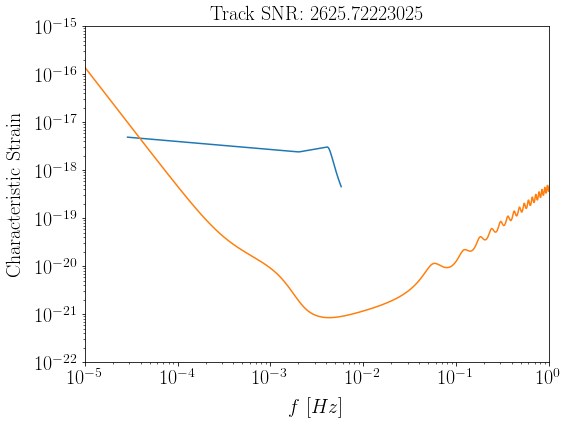

In [7]:
m1 = 0.5e6*LISA.TSUN # leading coefficient is the 
m2 = 0.5e6*LISA.TSUN #   mass in terms of solar mass

D_lum    = None         # Luminosity Distance, meters
z        = 3.           # Redshift
T_merger = 1.*LISA.YEAR # time to merger
f_start  = None         # start frequency

LISA.calculate_plot_source(m1, m2, constants, Dl=D_lum, z=z, T_merger=T_merger, f_start=f_start)

## Galactic Binary

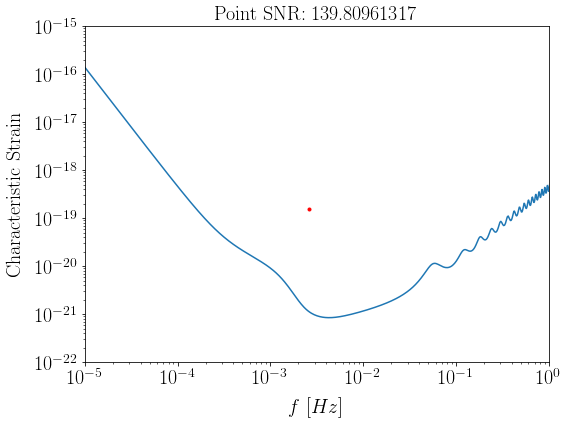

In [8]:
m1 = 0.50*LISA.TSUN        # leading coefficient is the 
m2 = 0.25*LISA.TSUN        #   mass in terms of solar mass

D_lum    = 1.0e-3*LISA.MPC # Luminosity Distance, meters
z        = None            # Redshift
T_merger = None            # time to merger
f_start  = 2.6e-3          # start frequency

LISA.calculate_plot_source(m1, m2, constants, Dl=D_lum, z=z, T_merger=T_merger, f_start=f_start)

## LIGO Binary

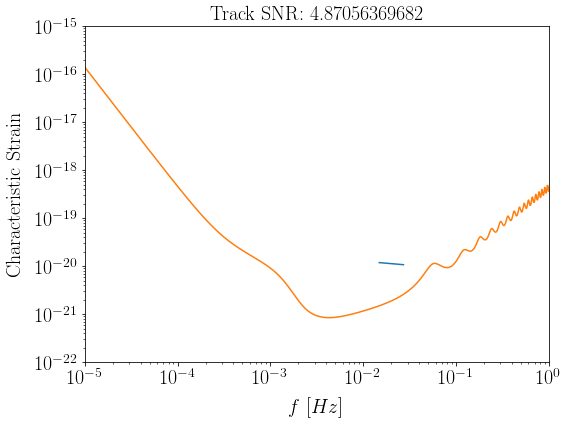

In [9]:
m1 = 36.0*LISA.TSUN # leading coefficient is the 
m2 = 29.0*LISA.TSUN #   mass in terms of solar mass

D_lum    = 410.*LISA.MPC # Luminosity Distance, meters
z        = None          # Redshift
T_merger = 5.*LISA.YEAR  # time to merger
f_start  = None          # start frequency

LISA.calculate_plot_source(m1, m2, constants, Dl=D_lum, z=z, T_merger=T_merger, f_start=f_start)